<a href="https://colab.research.google.com/github/AxelThorAsp/REI202G/blob/main/verkefni_3_rei202g_axel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

#Hluti 1 - myndræn framsetning

1)

In [5]:
innanlands = pd.read_csv('innanlands.csv', sep = ',')
synatokur = pd.read_csv('synatokur.csv', sep = ',')
landamaeri = pd.read_csv('landamaeri.csv', sep = ',')


# Vantar dálkaheiti :(
synatokur.rename(columns = {'Unnamed: 0':'Dagsetning'}, inplace = True)
landamaeri.rename(columns = {'Unnamed: 0': 'Dagsetning'}, inplace = True)



In [6]:
df = pd.merge(landamaeri, synatokur)
df.merge(innanlands)
df



,Dagsetning,Virk smit - skimun 1,Virk smit - skimun 2,Með mótefni,Einkennasýni,Landamæraskimun 1 og 2,Sóttkvíar- og handahófsskimanir,Skimanir á vegum ÍE
0,01.01.21,0.0,NaN,NaN,42,NaN,NaN,NaN
1,02.01.21,8.0,4,2.0,851,1224.0,122.0,62.0
2,03.01.21,11.0,,2.0,528,1017.0,24.0,NaN
3,04.01.21,6.0,,1.0,774,686.0,36.0,304.0
4,05.01.21,16.0,,3.0,780,788.0,22.0,18.0
...,...,...,...,...,...,...,...,...
611,17.02.22,88.0,3,NaN,4721,885.0,NaN,NaN
612,18.02.22,141.0,1,NaN,5365,625.0,NaN,NaN
613,19.02.22,50.0,0,NaN,4069,332.0,NaN,NaN
614,20.02.22,101.0,1,NaN,4317,542.0,NaN,NaN


#2)

In [7]:
POPULATION = 372_520

# tímaramminn
start_date = pd.to_datetime("01/12/2021",dayfirst = True)
end_date = pd.to_datetime("31/01/2022",dayfirst = True)

# to datetime
innanlands['Dagsetning'] = pd.to_datetime(innanlands['Dagsetning'], dayfirst = True)

# í röð
innanlands = innanlands.sort_values('Dagsetning')

mask = (innanlands['Dagsetning'] >= start_date) & (innanlands['Dagsetning'] <= end_date)
innanlands = innanlands.loc[mask]
innanlands

,Dagsetning,Einkennasýni,Sóttkvíar- og handahófsskimanir,Skimanir á vegum ÍE
375,2021-12-01,103.0,33.0,0.0
376,2021-12-02,111.0,15.0,0.0
377,2021-12-03,85.0,23.0,0.0
378,2021-12-04,59.0,22.0,0.0
379,2021-12-05,66.0,35.0,0.0
...,...,...,...,...
26,2022-01-27,1019.0,196.0,0.0
27,2022-01-28,1234.0,187.0,0.0
28,2022-01-29,760.0,132.0,0.0
29,2022-01-30,702.0,114.0,0.0


Text(0.5, 0.98, '14 daga nýgengi á 100.000 íbúa')

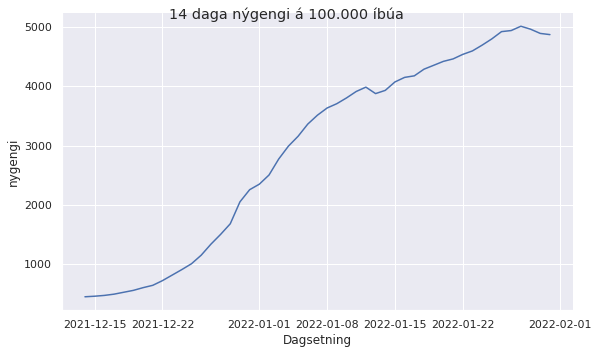

In [8]:
innanlands['sum'] = innanlands['Einkennasýni'] + innanlands['Sóttkvíar- og handahófsskimanir'] + innanlands['Skimanir á vegum ÍE']
innanlands['smit14'] = innanlands['sum'].rolling(14).sum()

g = sns.relplot(data = innanlands.assign(nygengi = innanlands['smit14'] / POPULATION * 100_000),
                kind = 'line',
                x = 'Dagsetning',
                y = 'nygengi'
                )
g.fig.set_figwidth(10)

g.fig.suptitle("14 daga nýgengi á 100.000 íbúa")

#3)

In [9]:
landamaeri

,Dagsetning,Virk smit - skimun 1,Virk smit - skimun 2,Með mótefni
0,01.01.21,0.0,NaN,NaN
1,02.01.21,8.0,4,2.0
2,03.01.21,11.0,,2.0
3,04.01.21,6.0,,1.0
4,05.01.21,16.0,,3.0
...,...,...,...,...
612,17.02.22,88.0,3,NaN
613,18.02.22,141.0,1,NaN
614,19.02.22,50.0,0,NaN
615,20.02.22,101.0,1,NaN


Text(0.5, 0.98, '14 daga nýgengi á landamærum per 100000')

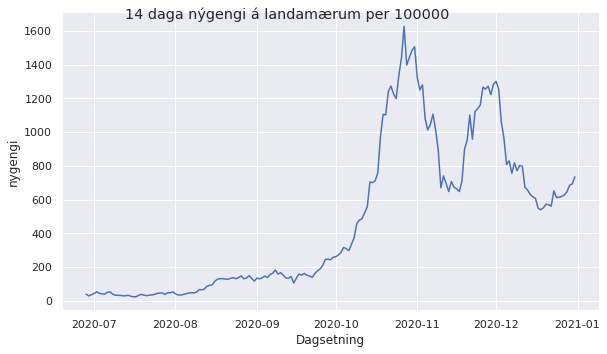

In [10]:
smit = landamaeri.merge(synatokur[['Dagsetning','Landamæraskimun 1 og 2']])

# geri ráð fyrir 0 þegar bil
smit['Virk smit - skimun 2'] = smit['Virk smit - skimun 2'].replace('\xa0', 0)

# smá dodgy
smit = smit.fillna(0)

smit['Virk smit - skimun 2'] = pd.to_numeric(smit['Virk smit - skimun 2'])
smit['Dagsetning'] = pd.to_datetime(smit['Dagsetning'], dayfirst = True)

start_date = pd.to_datetime("01/01/2020", dayfirst = True)
end_date = pd.to_datetime("31/12/2020", dayfirst = True)

mask = (smit['Dagsetning'] >= start_date) & (smit['Dagsetning'] <= end_date)
smit = smit[mask]
smit = smit.sort_values('Dagsetning')

# heildarsmit
# ég veit ekki hvað skimun 1 og skimun 2 er
# en ég ætla bara að gefa mér að heildarsmitin sé summan af þessu tvennu
smit['smit'] = smit.iloc[:, 1] + smit.iloc[:, 2]
smit['smit14'] = smit['smit'].rolling(14).sum()
smit['skimun14'] = smit['Landamæraskimun 1 og 2'].rolling(14).sum()

f = sns.relplot(data = smit.assign(nygengi = smit['smit14'] / smit['skimun14'] * 100_000),
                kind = 'line',
                x = 'Dagsetning',
                y = 'nygengi'
                )
f.fig.set_figwidth(10)
f.fig.suptitle("14 daga nýgengi á landamærum per 100000")

#4)

In [11]:
nygengi = innanlands['smit14'] / POPULATION * 100_000


In [12]:
synatokur['Dagsetning'] = pd.to_datetime(synatokur['Dagsetning'], dayfirst = True)

start_date = pd.to_datetime("01/12/2021", dayfirst = True)
end_date = pd.to_datetime("31/01/2022", dayfirst = True)

mask = (synatokur['Dagsetning'] >= start_date) & (synatokur['Dagsetning'] <= end_date)
synatokur = synatokur[mask]
synatokur = synatokur.sort_values('Dagsetning')
synatokur

,Dagsetning,Einkennasýni,Landamæraskimun 1 og 2,Sóttkvíar- og handahófsskimanir,Skimanir á vegum ÍE
642,2021-12-01,1405,857.0,727.0,0.0
643,2021-12-02,1374,897.0,480.0,0.0
644,2021-12-03,1448,853.0,505.0,0.0
645,2021-12-04,1058,767.0,545.0,0.0
646,2021-12-05,816,649.0,636.0,0.0
...,...,...,...,...,...
710,2022-01-27,3887,1116.0,1386.0,53.0
711,2022-01-28,3543,308.0,1098.0,0.0
712,2022-01-29,2452,659.0,742.0,0.0
713,2022-01-30,2214,988.0,727.0,0.0


In [13]:
innanlands['nygengi'] = innanlands['smit14'] / POPULATION * 100_000
innanlands

,Dagsetning,Einkennasýni,Sóttkvíar- og handahófsskimanir,Skimanir á vegum ÍE,sum,smit14,nygengi
375,2021-12-01,103.0,33.0,0.0,136.0,NaN,NaN
376,2021-12-02,111.0,15.0,0.0,126.0,NaN,NaN
377,2021-12-03,85.0,23.0,0.0,108.0,NaN,NaN
378,2021-12-04,59.0,22.0,0.0,81.0,NaN,NaN
379,2021-12-05,66.0,35.0,0.0,101.0,NaN,NaN
...,...,...,...,...,...,...,...
26,2022-01-27,1019.0,196.0,0.0,1215.0,18396.0,4938.258349
27,2022-01-28,1234.0,187.0,0.0,1421.0,18666.0,5010.737679
28,2022-01-29,760.0,132.0,0.0,892.0,18481.0,4961.075915
29,2022-01-30,702.0,114.0,0.0,816.0,18216.0,4889.938795


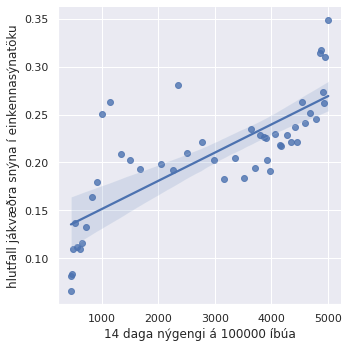

In [16]:

df4 = synatokur.merge(innanlands[['Dagsetning', 'Einkennasýni','nygengi']], on = 'Dagsetning')
df4['hlutfall'] = df4['Einkennasýni_y'] / df4['Einkennasýni_x']
df4

h = sns.lmplot(data = df4,
            x = 'nygengi',
            y = 'hlutfall'
            )
h.set_xlabels('14 daga nýgengi á 100000 íbúa')
h.set_ylabels('hlutfall jákvæðra snýna í einkennasýnatöku')

#Hluti 2

#a)

In [17]:
stad = pd.read_csv('https://fasteignaskra.is/Stadfangaskra.csv')
kaupskrar = pd.read_csv('https://objectstorage.eu-frankfurt-1.oraclecloud.com/n/frs3o1zldvgn/b/public_data_for_download/o/kaupskra.csv', sep = ';', low_memory = False)

In [18]:
kaupskrar['utgdag'] = pd.to_datetime(kaupskrar['utgdag'])

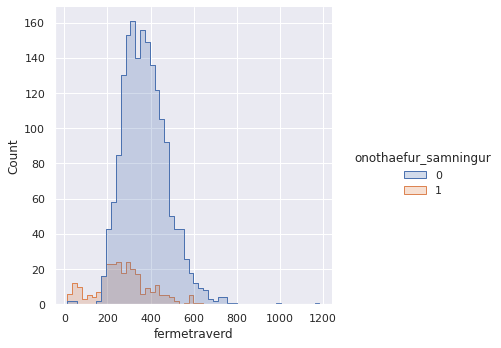

In [23]:
sambaerilegt = kaupskrar[(kaupskrar['sveitarfelag'] == 'Reykjavíkurborg             ') & (kaupskrar['tegund'] == 'Sérbýli       ')] # skemmtileg bil :)
mask = (sambaerilegt['utgdag'] >= pd.to_datetime('01/01/2015')) & (sambaerilegt['utgdag'] <= pd.to_datetime('01/01/2022'))
sambaerilegt = sambaerilegt[mask]
sambaerilegt['fermetraverd'] = sambaerilegt.kaupverd / sambaerilegt.einflm
q = sns.displot(data = sambaerilegt,
                x = 'fermetraverd',
                hue = 'onothaefur_samningur',
                element='step', 
                )

Eins og sést er fermetraverð fyrir ónothæfa samninga vinstra megin við miðgildið fyrir nothæfa samninga.

#b)

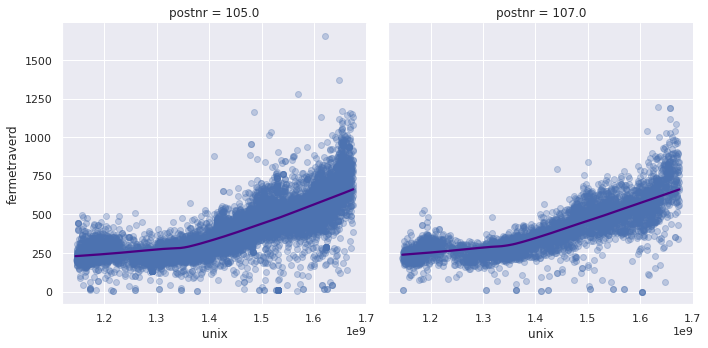

In [46]:
kaupskrar['fermetraverd'] = kaupskrar.kaupverd / kaupskrar.einflm
fjolbyli = kaupskrar[kaupskrar.tegund == 'Fjölbýli      ']
fjolbyli = fjolbyli[(fjolbyli.postnr == 107) | (fjolbyli.postnr == 105)]
fjolbyli['unix'] = fjolbyli['utgdag'].apply(lambda x: x.timestamp())
sns.lmplot(data = fjolbyli,
            y = 'fermetraverd',
            x = 'unix',
            col = 'postnr',
            lowess = True,
            scatter_kws = {'alpha' : 0.3},
            line_kws={'color': 'indigo'}
            )

#c)

In [35]:
stad

,FID,HNITNUM,SVFNR,BYGGD,LANDNR,HEINUM,MATSNR,POSTNR,HEITI_NF,HEITI_TGF,...,YFIRF_HEITI,ATH,NAKV_XY,HNIT,N_HNIT_WGS84,E_HNIT_WGS84,NOTNR,LM_HEIMILISFANG,VEF_BIRTING,HUSMERKING
0,Stadfangaskra.fid-1d88f065_186a88a5a5a_65a1,10001414,1000,1,177597,1091497,NaN,201,Bæjarlind,Bæjarlind,...,NaN,NaN,NaN,POINT (359665 402849),64.099870,-21.879140,956.0,Bæjarlind 8 (177597),Bæjarlind 8 (177597),8
1,Stadfangaskra.fid-1d88f065_186a88a5a5a_65a2,10001419,1000,1,115670,1022800,NaN,200,Nýbýlavegur,Nýbýlavegi,...,NaN,NaN,NaN,POINT (359012 404473),64.114155,-21.894043,857.0,Nýbýlavegur 12 (115670),Nýbýlavegur 12 (115670),12
2,Stadfangaskra.fid-1d88f065_186a88a5a5a_65a3,10001420,1000,1,174784,1087926,NaN,201,Dalsmári,Dalsmára,...,NaN,NaN,NaN,POINT (359017 403440),64.104900,-21.892971,956.0,Dalsmári 11 (174784),Dalsmári 11 (174784),11
3,Stadfangaskra.fid-1d88f065_186a88a5a5a_65a4,10001421,1000,1,174784,1087926,NaN,201,Dalsmári,Dalsmára,...,NaN,NaN,NaN,POINT (358956 403424),64.104732,-21.894206,956.0,Dalsmári 9 (174784),Dalsmári 9 (174784),9
4,Stadfangaskra.fid-1d88f065_186a88a5a5a_65a5,10001422,1000,1,114163,1021068,NaN,200,Digranesheiði,Digranesheiði,...,NaN,NaN,NaN,POINT (359541 403951),64.109694,-21.882711,956.0,Digranesheiði 8 (114163),Digranesheiði 8 (114163),8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130692,Stadfangaskra.fid-1d88f065_186a9f040c6_6427,10155419,8614,4,235398,1211320,NaN,851,Hái-Rimi,Háa-Rima,...,NaN,Póstnúmer uppfært,NaN,POINT (423329.143948993 361414.540781884),63.748437,-20.552870,956.0,Hái-Rimi 6 (235398),Hái-Rimi 6 (235398),6
130693,Stadfangaskra.fid-1d88f065_186a9f040c6_6428,10155423,8614,5,235326,1211167,NaN,851,Ásavellir,Ásavöllum,...,NaN,Póstnúmer uppfært,NaN,POINT (440421.429313089 387689.541904943),63.987417,-20.217029,956.0,Ásavellir (235326),Ásavellir (235326),NaN
130694,Stadfangaskra.fid-1d88f065_186a9f040c6_6429,10155421,8614,4,235397,1211319,NaN,851,Hái-Rimi,Háa-Rima,...,NaN,Póstnúmer uppfært,NaN,POINT (423263.735217491 361334.859462384),63.747708,-20.554155,956.0,Hái-Rimi 5 (235397),Hái-Rimi 5 (235397),5
130695,Stadfangaskra.fid-1d88f065_186a9f040c6_642a,10155422,8614,1,235411,1211338,NaN,851,Gaddstaðir,Gaddstöðum,...,NaN,Póstnúmer uppfært,NaN,POINT (431166.927852427 368932.259815184),63.817489,-20.397546,956.0,Gaddstaðir 49 (235411),Gaddstaðir 49 (235411),49


In [36]:
# vestan við þetta hnit og í 101 -> gamli vesturbær
LONGITUDE = -21.9412
df = stad.merge(kaupskrar, left_on = 'HEINUM', right_on = 'heinum')
mask = df[(df['postnr'] == 107) | ((df['postnr'] == 101) & (df['E_HNIT_WGS84'] < LONGITUDE))]
mask

,FID,HNITNUM,SVFNR,BYGGD,LANDNR,HEINUM,MATSNR,POSTNR,HEITI_NF,HEITI_TGF,...,fasteignamat,byggar,fepilog,einflm,lod_flm,lod_flmein,tegund,fullbuid,onothaefur_samningur,fermetraverd
123,Stadfangaskra.fid-1d88f065_186a88a5a5a_65b9,10001463,0,1,106545,1138636,NaN,107,Fálkagata,Fálkagötu,...,17750,1969,010203,61.1,653.0,m²,Fjölbýli,1,0,327.332242
124,Stadfangaskra.fid-1d88f065_186a88a5a5a_65b9,10001463,0,1,106545,1138636,NaN,107,Fálkagata,Fálkagötu,...,22300,1969,010204,75.8,653.0,m²,Fjölbýli,1,0,343.007916
125,Stadfangaskra.fid-1d88f065_186a88a5a5a_65b9,10001463,0,1,106545,1138636,NaN,107,Fálkagata,Fálkagötu,...,27350,1969,010303,60.4,653.0,m²,Fjölbýli,1,0,528.145695
126,Stadfangaskra.fid-1d88f065_186a88a5a5a_65ba,10001464,0,1,106545,1138637,NaN,107,Fálkagata,Fálkagötu,...,16650,1969,010301,63.5,653.0,m²,Fjölbýli,1,0,307.086614
127,Stadfangaskra.fid-1d88f065_186a88a5a5a_65ba,10001464,0,1,106545,1138637,NaN,107,Fálkagata,Fálkagötu,...,18550,1969,010101,66.3,653.0,m²,Fjölbýli,1,0,333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177605,Stadfangaskra.fid-1d88f065_186a9f040c6_57ea,10117733,0,1,216910,1142985,NaN,107,Grandavegur,Grandavegi,...,18750,2016,060203,103.5,8459.0,m²,Fjölbýli,1,0,468.599034
178787,Stadfangaskra.fid-1d88f065_186a9f040c6_5d17,10105910,0,1,100215,1138179,NaN,101,Grófin,Grófinni,...,25160,1916,020101,556.4,630.0,m²,Atvinnuhúsnæði,1,1,467.289720
178788,Stadfangaskra.fid-1d88f065_186a9f040c6_5d17,10105910,0,1,100215,1138179,NaN,101,Grófin,Grófinni,...,26300,1916,020102,556.4,630.0,m²,Atvinnuhúsnæði,1,1,467.289720
178789,Stadfangaskra.fid-1d88f065_186a9f040c6_5d17,10105910,0,1,100215,1138179,NaN,101,Grófin,Grófinni,...,17035,1916,020301,556.4,630.0,m²,Atvinnuhúsnæði,1,1,467.289720


In [ ]:
mask.set_index('utgdag', inplace = True)

In [40]:
Data = mask.groupby([pd.Grouper(freq='M'), 'postnr'])[['fermetraverd']].mean()

In [41]:
Data

fermetraverd
utgdag     postnr              
2006-04-30 107.0     209.230104
2006-05-31 101.0     265.741770
           107.0     220.084076
2006-06-30 101.0     251.219458
           107.0     221.301214
...                         ...
2022-11-30 107.0     673.926974
2022-12-31 101.0     688.076327
           107.0     750.320609
2023-01-31 101.0     703.232529
           107.0     700.793236

[403 rows x 1 columns]

In [42]:
d = Data.reset_index()
d = d.pivot(index ='utgdag' ,columns = ['postnr'], values = 'fermetraverd')
d.reset_index(inplace=True, level=['utgdag'])

In [43]:
d.rename(columns={101.0: "101", 107.0: "107"}, inplace = True)

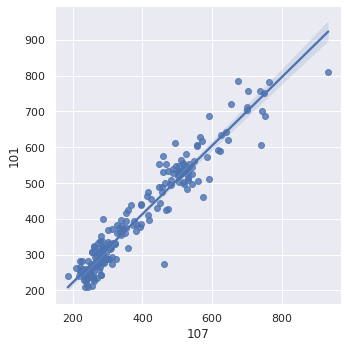

In [44]:
q = sns.lmplot(data = d,
                x = "107",
                y = "101",
                )

#Frekar bein lína 🌎